In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory
import healpy as hp

In [2]:
survey_length = 2.2 # days
# Define what we want the final visit ratio map to look like
target_map = fs.standard_goals()
filters = ['u', 'g', 'r', 'i', 'z', 'y']
#filters = ['r']
surveys = []

for filtername in filters:

    bfs = []
    bfs.append(fs.Depth_percentile_basis_function(filtername=filtername))
    bfs.append(fs.Target_map_basis_function(filtername=filtername, 
                                            target_map=target_map[filtername]))
              
    bfs.append(fs.North_south_patch_basis_function())
    bfs.append(fs.Slewtime_basis_function(filtername=filtername))
    bfs.append(fs.Filter_change_basis_function(filtername=filtername))

    weights = np.array([0.5, 1., 1., 1., 0.3])
    surveys.append(fs.Simple_greedy_survey_fields(bfs, weights, block_size=1, filtername=filtername))

scheduler = fs.Core_scheduler(surveys)

observatory = Speed_observatory()
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler,
                                                     survey_length=survey_length,
                                                     filename='marching_d%i.db' % survey_length,
                                                     delete_past=True)

/Users/yoachim/gitRepos/sims_ocs/python/lsst/sims/ocs/environment/seeing_model.py:61: RuntimeWarning: invalid value encountered in power
  airmass_correction = numpy.power(airmass, self.AIRMASS_CORRECTION_POWER)
/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/surveys.py:466: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  reward_fields[np.where(reward_fields.mask == True)] = -np.inf


progress = 99.0%Completed 1887 observations


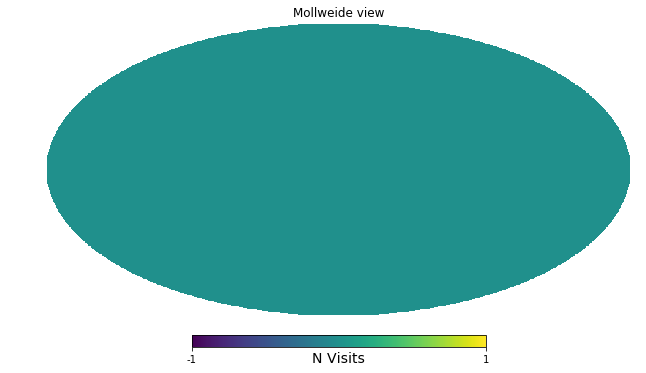

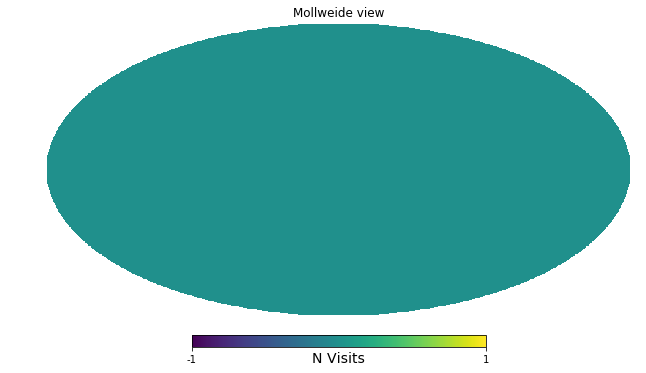

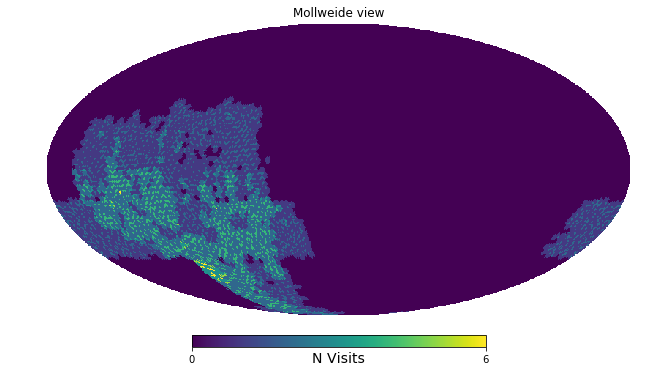

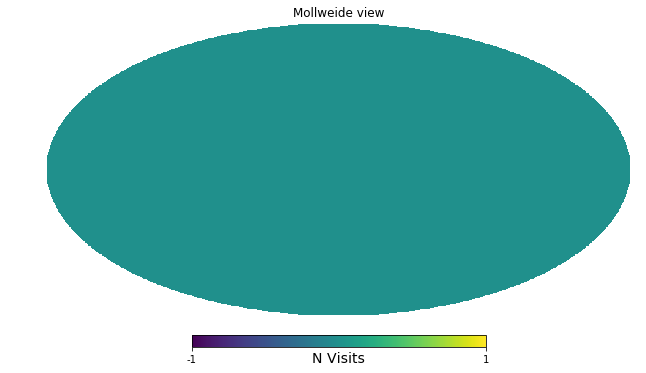

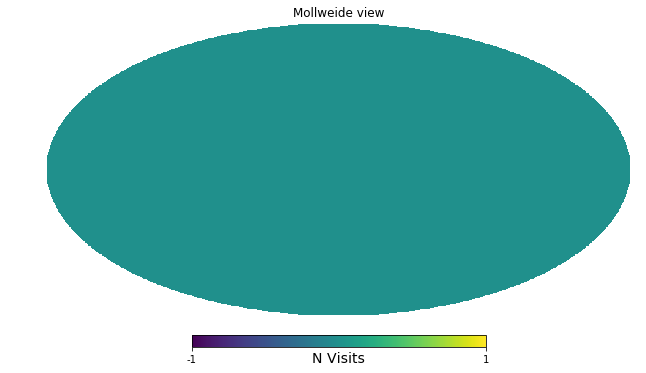

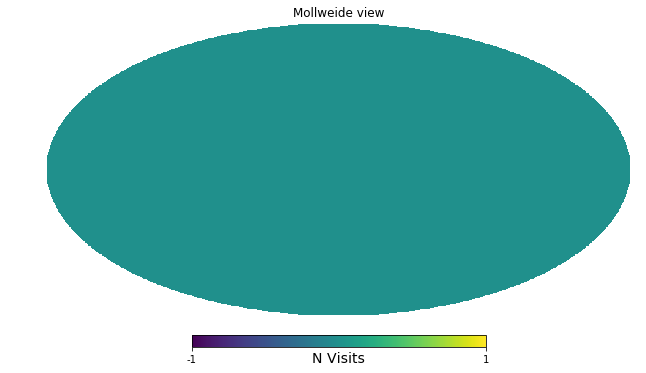

In [3]:
for survey in scheduler.surveys:
    hp.mollview(survey.basis_functions[1].survey_features['N_obs'].feature,  unit='N Visits')

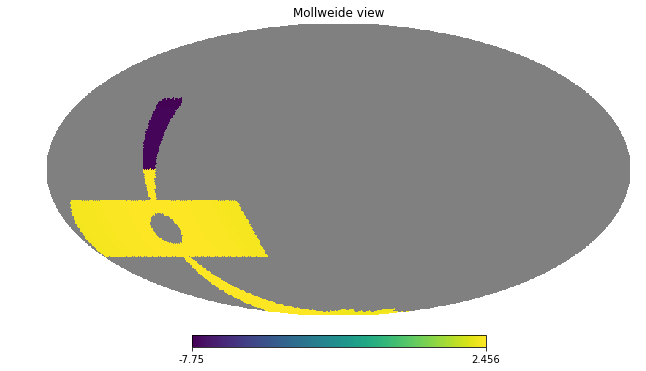

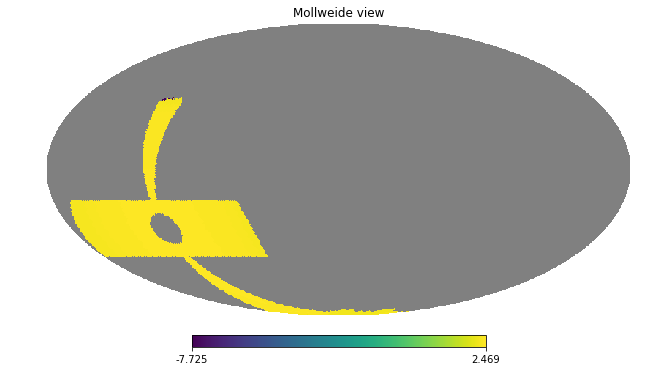

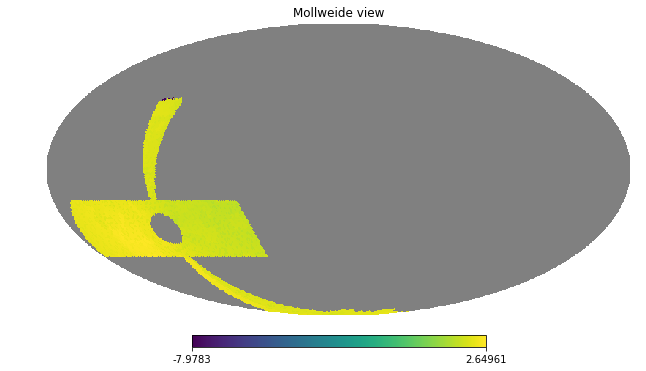

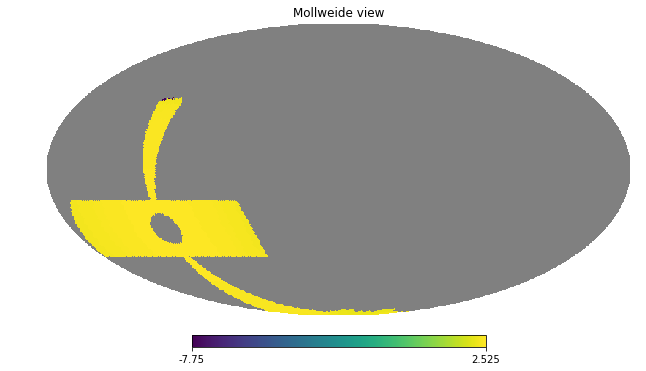

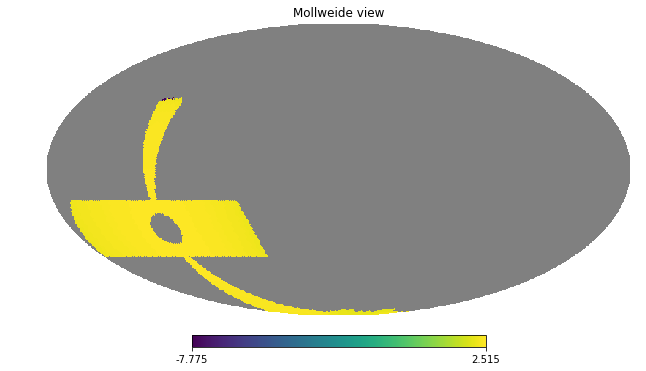

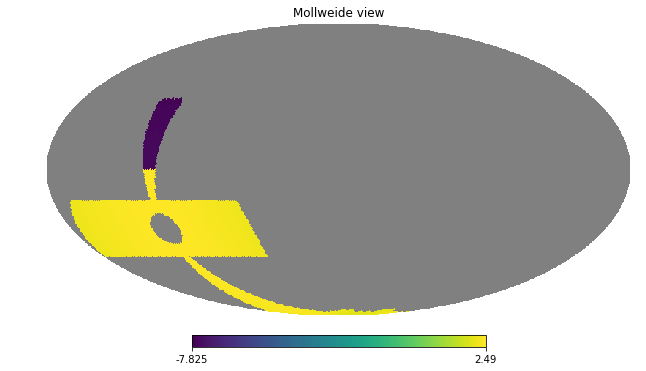

In [4]:
for survey in scheduler.surveys:
    hp.mollview(survey.reward)

1.0
0.0


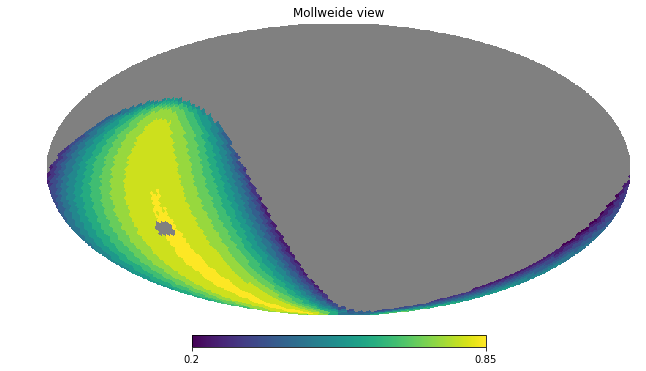

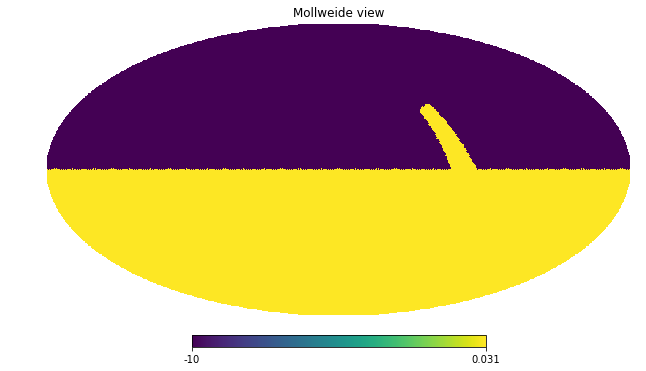

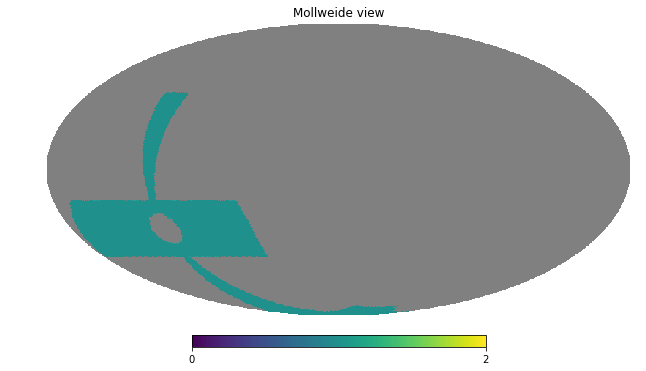

In [13]:
for bf in scheduler.surveys[0].basis_functions:
    val = bf()
    if np.size(val) == 1:
        print(val)
    else:
        hp.mollview(val)

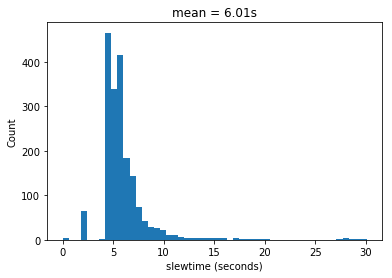

In [6]:
none = plt.hist(observations['slewtime'], bins=50)
plt.xlabel('slewtime (seconds)')
plt.ylabel('Count')
plt.title('mean = %.2fs' % np.mean(observations['slewtime']))

In [7]:
fc = np.where(observations['filter'] != np.roll(observations['filter'],-1))[0].size
print('%i filter changes' % fc)

0 filter changes


In [8]:
np.where(observations['filter'] != np.roll(observations['filter'],-1))[0]

observations['night'][250:256]

array([0, 0, 0, 0, 0, 0])

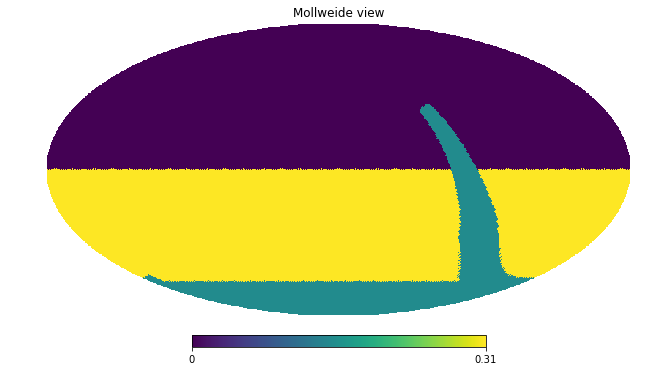

In [9]:
hp.mollview(target_map['u'])

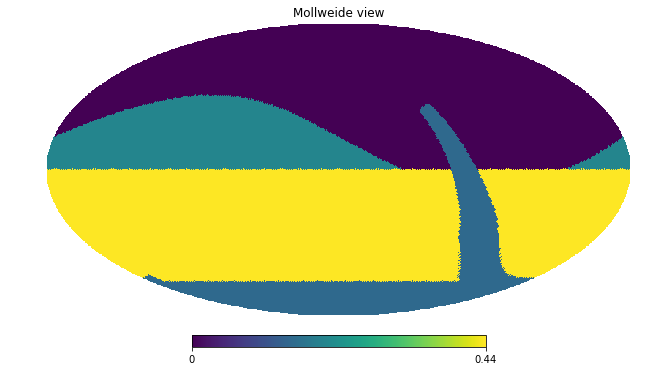

In [10]:
hp.mollview(target_map['g'])

In [11]:
target_map = fs.standard_goals()
target_filter_ratio = fs.filter_count_ratios(target_map)

In [12]:
target_filter_ratio

{'g': 0.10336519162691639,
 'i': 0.22561605997306725,
 'r': 0.22561605997306725,
 'u': 0.065831658241979618,
 'y': 0.17667511659999122,
 'z': 0.20289591358497827}